In [28]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

(600, 400)


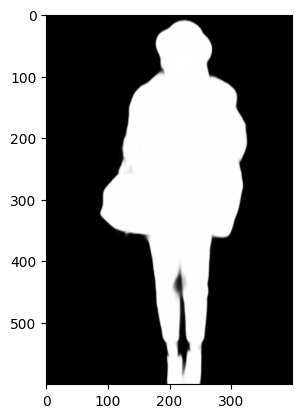

In [29]:
path = "test_data/u2net_results/0008.png"
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
print(img.shape)

plt.imshow(img, cmap="gray")
plt.show()

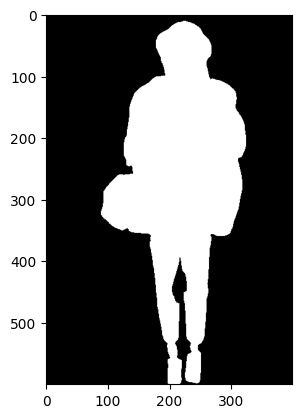

In [32]:
def post_process_image(image, min_contour_area=100):
    _, binary = cv2.threshold(image, 250, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    output = np.zeros_like(image)
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > min_contour_area:
            cv2.drawContours(output, [contour], 0, (255, 255, 255), -1)

    kernel_er = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    kernel_dil = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

    output = output.astype(np.float32) / 255
    output = cv2.erode(output, kernel_er, iterations=1)
    output = cv2.dilate(output, kernel_dil, iterations=1)
    output = (255 * output).astype(np.uint8)

    return output


im = post_process_image(img)
plt.imshow(im, cmap="gray")
plt.show()